<a href="https://colab.research.google.com/github/hildj/linear_models_assignment/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Linear Models
## Do two questions in total: "Q1+Q2" or "Q1+Q3"
### `! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

In [8]:
! git clone https://github.com/hildj/linear_models_assignment.git


fatal: destination path 'linear_models_assignment' already exists and is not an empty directory.


### 1. The SSE  

The model is:  

$$
y_i = b_0 + b_1 z_{i1} + b_2 z_{i2} + e_i
$$  

The sum of squared errors (SSE) is:  

$$
SSE(b_0, b_1, b_2) = \sum_{i=1}^N \Big( y_i - b_0 - b_1 z_{i1} - b_2 z_{i2} \Big)^2
$$


### 2. Partial derivatives  

For this one, we take derivatives of the SSE with respect to each coefficient.  

1. With respect to \( b_0 \):  

$$
\frac{\partial SSE}{\partial b_0} = -2 \sum_{i=1}^N \Big( y_i - b_0 - b_1 z_{i1} - b_2 z_{i2} \Big)
$$  

2. With respect to \( b_1 \):  

$$
\frac{\partial SSE}{\partial b_1} = -2 \sum_{i=1}^N z_{i1}\Big( y_i - b_0 - b_1 z_{i1} - b_2 z_{i2} \Big)
$$  

3. With respect to \( b_2 \):  

$$
\frac{\partial SSE}{\partial b_2} = -2 \sum_{i=1}^N z_{i2}\Big( y_i - b_0 - b_1 z_{i1} - b_2 z_{i2} \Big)
$$


###3. Properties of the residuals  

At the optimum, the first-order conditions imply:  

- The **average error is zero**:  

$$
\sum_{i=1}^N e_i = 0
$$  

- Errors are orthogonal to each regressor:  

$$
\sum_{i=1}^N e_i z_{i1} = 0, \quad \sum_{i=1}^N e_i z_{i2} = 0
$$  

This is the same property that was in simple linear regression.


### 4. Optimal intercept  

From the first condition:  

$$
\sum_{i=1}^N (y_i - b_0 - b_1 z_{i1} - b_2 z_{i2}) = 0
$$  

Since the \( z \)’s are demeaned (\(\sum z_{ij} = 0\)), this simplifies to:  

$$
Nb_0 = \sum_{i=1}^N y_i
$$  

So:  

$$
b_0^* = \bar{y}
$$


### 5. Reduced equations for \( b_1, b_2 \)  

Plugging \( b_0^* = \bar{y} \) into the other two equations, we get:  

1.  

$$
\sum_{i=1}^N z_{i1}(y_i - \bar{y}) = b_1 \sum_{i=1}^N z_{i1}^2 + b_2 \sum_{i=1}^N z_{i1} z_{i2}
$$  

2.  

$$
\sum_{i=1}^N z_{i2}(y_i - \bar{y}) = b_1 \sum_{i=1}^N z_{i1} z_{i2} + b_2 \sum_{i=1}^N z_{i2}^2
$$  


### 6. Matrix form (so the Normal Equations)  

We can write these two equations in matrix form so I will write them as such:  

$$
\begin{bmatrix}
\sum z_{i1}^2 & \sum z_{i1}z_{i2} \\
\sum z_{i1}z_{i2} & \sum z_{i2}^2
\end{bmatrix}
\begin{bmatrix}
b_1 \\
b_2
\end{bmatrix}
=
\begin{bmatrix}
\sum z_{i1}(y_i - \bar{y}) \\
\sum z_{i2}(y_i - \bar{y})
\end{bmatrix}
$$  

This is the system \( A b = C \).


### Continuing above, we can divide by N and substitute back  

If we divide both sides by \( N \), we recognize averages (covariances).  

- The matrix \( A \) becomes the covariance matrix of the predictors:  

$$
A =
\begin{bmatrix}
\text{Var}(x_1) & \text{Cov}(x_1, x_2) \\
\text{Cov}(x_1, x_2) & \text{Var}(x_2)
\end{bmatrix}
$$  

- The vector \( C \) becomes the covariance of each predictor with \( y \):  

$$
C =
\begin{bmatrix}
\text{Cov}(x_1, y) \\
\text{Cov}(x_2, y)
\end{bmatrix}
$$  

**My Intuition:**  
-Each slope \(b_1\) and \(b_2\) shows how strongly that predictor moves with \(y\), taking into account the other predictor.

-If the predictors are correlated, the slopes adjust so that each one reflects the predictor’s unique contribution to \(y\).

-The intercept is the mean of \(y\), because the predictors are centered when predictors are at their average, predicted \(y\) equals the average \(y\).

-The covariance matrix \(A\) “balances” the predictors’ relationships with each other, making sure the plane fits the data in the least-squares sense.

-Geometrically, the regression finds the plane that minimizes squared vertical errors while keeping residuals uncorrelated with each predictor.



**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q3.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

In [1]:
! git clone https://github.com/hildj/linear_models_assignment.git


Cloning into 'linear_models_assignment'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 15 (delta 2), reused 0 (delta 0), pack-reused 9 (from 1)
Receiving objects: 100% (15/15), 59.50 KiB | 725.00 KiB/s, done.
Resolving deltas: 100% (2/2), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# load the data
df = pd.read_csv("/content/linear_models_assignment/data/heart_hw.csv")
df.head()

,Unnamed: 0,age,transplant,y
0,1,53,control,0
1,2,43,control,0
2,3,52,control,0
3,4,52,control,0
4,5,54,control,0


In [3]:
# I split the data into control and treatment groups
ctrl = df[df['transplant']=='control']
trt = df[df['transplant']=='treatment']

# Calculated the proportion of people who survived in each group
p_ctrl = ctrl['y'].mean()
p_trt = trt['y'].mean()

# The difference is the average treatment effect
ate = p_trt - p_ctrl

print("Control survival:", round(p_ctrl,3))
print("Treatment survival:", round(p_trt,3))
print("ATE:", round(ate,3))


Control survival: 0.118
Treatment survival: 0.348
ATE: 0.23


In [4]:
# I turned transplant into a 0/1 variable so it can go in a regression
df['transplant_bin'] = (df['transplant']=='treatment').astype(int)

X = df[['transplant_bin']]
y = df['y']

model = LinearRegression().fit(X, y)

print("Intercept (control group survival):", round(model.intercept_,3))
print("Coefficient on transplant:", round(model.coef_[0],3))


Intercept (control group survival): 0.118
Coefficient on transplant: 0.23


In [5]:
# Added age as another predictor to see how it affects survival
X_age = df[['transplant_bin','age']]

model_age = LinearRegression().fit(X_age, y)

print("Intercept (age 0, control):", round(model_age.intercept_,3))
print("Coefficient transplant:", round(model_age.coef_[0],3))
print("Coefficient age:", round(model_age.coef_[1],3))


Intercept (age 0, control): 0.702
Coefficient transplant: 0.265
Coefficient age: -0.014


In [6]:
# Split into train and test sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

# I used polynomial features to let age have a non-linear effect and interact with transplant
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(train[['age','transplant_bin']])
X_test_poly = poly.transform(test[['age','transplant_bin']])

# Fitted the model on the training data
model_poly = LinearRegression().fit(X_train_poly, train['y'])

# Got predictions for the test data
preds = model_poly.predict(X_test_poly)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


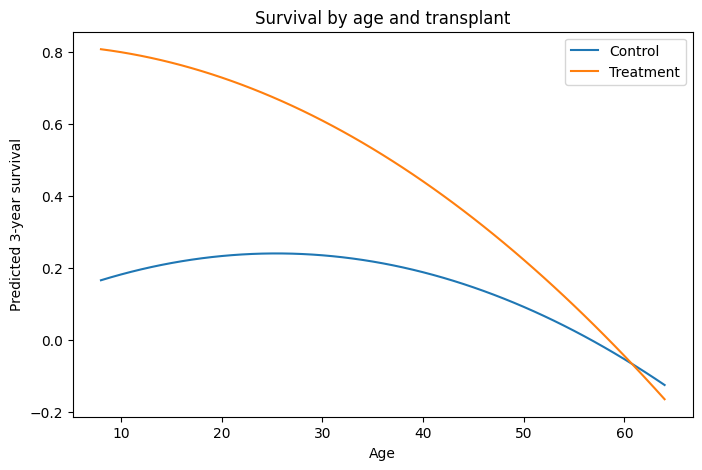

In [7]:
ages = np.arange(df['age'].min(), df['age'].max()+1)
groups = [0,1] # 0=control,1=treatment

plt.figure(figsize=(8,5))

for g in groups:
    X_plot = poly.transform(np.column_stack([ages, np.full_like(ages, g)]))
    y_plot = model_poly.predict(X_plot)
    plt.plot(ages, y_plot, label='Treatment' if g==1 else 'Control')

plt.xlabel('Age')
plt.ylabel('Predicted 3-year survival')
plt.title('Survival by age and transplant')
plt.legend()
plt.show()


Question 2:

The intercept matches the survival proportion in the control group (same as step 1). The coefficient on transplant matches the ATE we calculated. This makes sense because with a single binary predictor, the intercept represents the baseline (control) mean, and the coefficient represents the difference between treatment and control which is exactly what the ATE measures.

Question 3:

Adding age changes the intercept because it now represents the predicted survival of a control patient at age 0, rather than the average survival of all control patients. The coefficient on age is negative, showing that older patients are less likely to survive, and the coefficient on transplant shows the treatment effect after adjusting for age.

Question 4:

The plot shows that transplant generally increases survival probability. Younger patients benefit more from a transplant, while the difference between treatment and control decreases as age increases. Survival decreases with age in both groups. Using polynomial features and interaction terms allows the model to capture these non-linear effects and differences between groups more realistically than a simple linear model.

Question 5: Considerations

I thought about some ethical concerns with using a model like this to decide who gets transplants:

- The dataset is pretty small, so the predictions might not be very reliable.
- Older patients could be unfairly deprioritized if an algorithm is used automatically.
- The model only predicts survival, but it doesn’t consider quality of life, complications, or other health factors.
- Using a model like this to make real-life decisions could lead to bias or discrimination against certain groups.

Overall, this kind of model is useful for understanding trends and getting insights, but it shouldn’t be used on its own to make life-or-death decisions.
